In [1]:
from sqlalchemy import create_engine
import pymysql
import openpyxl
import pandas as pd
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling
import sklearn
import seaborn as sns


#SKlearn Stuff
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
#helpers
%matplotlib inline

In [2]:
credit = pd.read_csv('creditT3.csv')
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30201 non-null  int64 
 1   LIMIT_BAL                   30201 non-null  int64 
 2   SEX                         30201 non-null  object
 3   EDUCATION                   30201 non-null  object
 4   MARRIAGE                    30201 non-null  int64 
 5   AGE                         30201 non-null  int64 
 6   PAY_0                       30201 non-null  int64 
 7   PAY_2                       30201 non-null  int64 
 8   PAY_3                       30201 non-null  int64 
 9   PAY_4                       30201 non-null  int64 
 10  PAY_5                       30201 non-null  int64 
 11  PAY_6                       30201 non-null  int64 
 12  BILL_AMT1                   30201 non-null  int64 
 13  BILL_AMT2                   30201 non-null  in

In [4]:
credit = pd.get_dummies(credit)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30201 non-null  int64
 1   LIMIT_BAL                               30201 non-null  int64
 2   MARRIAGE                                30201 non-null  int64
 3   AGE                                     30201 non-null  int64
 4   PAY_0                                   30201 non-null  int64
 5   PAY_2                                   30201 non-null  int64
 6   PAY_3                                   30201 non-null  int64
 7   PAY_4                                   30201 non-null  int64
 8   PAY_5                                   30201 non-null  int64
 9   PAY_6                                   30201 non-null  int64
 10  BILL_AMT1                               30201 non-null  int64
 11  BILL_AMT2      

In [6]:
credit.duplicated().sum()

201

In [7]:
credit = credit.drop_duplicates()
credit.duplicated().sum()

0

In [8]:
credit.reset_index(drop=True,inplace=True)

In [9]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


In [13]:
###3 Iloc demo
credit.iloc[:, 0:]

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,39,0,0,0,0,0,0,...,5000,1000,0,1,0,1,0,0,0,1
29996,29997,150000,2,43,-1,-1,-1,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
29997,29998,30000,2,37,4,3,2,-1,0,0,...,2000,3100,0,1,0,0,0,1,1,0
29998,29999,80000,1,41,1,-1,0,0,0,-1,...,52964,1804,0,1,0,1,0,0,1,0


# 1. Predicting Accuracy with DT, RFC and GBC Like in C1T, Default PMT as dependant, acc. 82

In [14]:
#features
X = credit.iloc[:, :-2]
print('Summary of feature sample')
X.head()

Summary of feature sample


,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,0,0,1
1,2,120000,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,0,0,0,1
2,3,90000,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,1,0,0,0,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,1,0,0,0,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,1,0,0,0,1


In [381]:
### select features from middle
credit[['ID', 'LIMIT_BAL', 'AGE']]

,ID,LIMIT_BAL,AGE
0,1,20000,24
1,2,120000,26
2,3,90000,34
3,4,50000,37
4,5,50000,57
...,...,...,...
29995,29996,220000,39
29996,29997,150000,43
29997,29998,30000,37
29998,29999,80000,41


In [382]:
y= credit['default payment next month_default']

In [383]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: uint8

In [384]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)

In [385]:
x_test

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
25665,25666,40000,2,26,-1,0,0,0,-1,0,...,0,22373,680,10000,1,0,0,0,0,1
16464,16465,80000,1,59,0,0,0,0,0,0,...,2000,1603,1903,2006,1,0,0,1,0,0
22386,22387,170000,2,30,2,2,2,2,2,2,...,0,13000,5500,1000,1,0,1,0,0,0
10149,10150,200000,1,41,-2,-2,-2,-2,-2,-2,...,0,0,0,0,1,0,0,0,0,1
8729,8730,50000,1,43,0,0,0,0,0,0,...,331,341,356,330,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548,17549,60000,1,48,0,0,0,0,0,0,...,1400,600,1000,1000,1,0,0,0,0,1
11459,11460,310000,1,43,-1,-1,-1,-1,-1,-1,...,2018,2505,816,3052,0,1,0,0,0,1
6608,6609,10000,2,22,0,0,0,0,0,2,...,1000,1535,0,1000,1,0,0,0,0,1
2414,2415,30000,1,38,1,-1,-1,-1,-1,-2,...,2713,0,0,0,0,1,0,0,0,1


In [386]:
y_test

25665    0
16464    0
22386    1
10149    1
8729     0
        ..
17548    1
11459    0
6608     0
2414     1
14757    0
Name: default payment next month_default, Length: 9000, dtype: uint8

In [387]:
#Modeling (Classification)
algo_credit1= DecisionTreeClassifier(max_depth=20, )
model_credit = algo_credit1.fit(x_train,y_train)
#Predictions
preds_credit= model_credit.predict(x_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      7052
           1       0.44      0.38      0.41      1948

    accuracy                           0.76      9000
   macro avg       0.63      0.62      0.63      9000
weighted avg       0.75      0.76      0.75      9000



In [388]:
#Modeling (Classification)
algo_credit2= RandomForestClassifier( )
model_credit = algo_credit2.fit(x_train,y_train)
#Predictions
preds_credit= model_credit.predict(x_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7052
           1       0.63      0.37      0.46      1948

    accuracy                           0.82      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [389]:
#Modeling (Classification)
algo_credit3= GradientBoostingClassifier( )
model_credit = algo_credit3.fit(x_train,y_train)
#Predictions
preds_credit= model_credit.predict(x_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [23]:
np.random.seed(42)

In [390]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [391]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [392]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y)
    results.append(result)
    names.append(name)

In [393]:
results

[array([0.80566667, 0.80733333, 0.82016667, 0.82883333, 0.817     ]),
 array([0.613     , 0.70766667, 0.65816667, 0.73366667, 0.71166667]),
 array([0.78083333, 0.81133333, 0.78933333, 0.79383333, 0.779     ])]

In [394]:
print(cross_val_score(model, X, y, cv=5, )) # cv = number of folds being held out

[0.7805     0.81133333 0.78916667 0.79383333 0.779     ]


In [395]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8158
Decision Tree Classifier 0.6848333333333333
Gradient Bossting Class 0.7908666666666666


# Predictive Analysis

In [396]:
#DecisionTreeClassifier
DT=algo_credit1
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [397]:
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.7608888888888888

In [398]:
#RandomForestClassifier
RF=algo_credit2
RF.fit(x_train, y_train)

RandomForestClassifier()

In [399]:
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.8153333333333334

In [400]:
#GradientBoostingClassifier
GB=algo_credit3
GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [401]:
predictions = GB.predict(x_test)
GB.score(x_test, y_test)

0.821

# 2. Predicting Accuracy with DT, RFC and GBC, Limit_Bal as dependant, 7 bins acc .62

In [55]:
credit.dtypes.index

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')

In [56]:
#features
XMA = credit[['MARRIAGE', 'AGE',]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,0,0,1
1,2,120000,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,0,0,0,1
2,3,90000,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,1,0,0,0,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,1,0,0,0,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,1,0,0,0,1


In [57]:
yMA = credit['LIMIT_BAL']

Text(0.5, 0, 'Balance Limit')

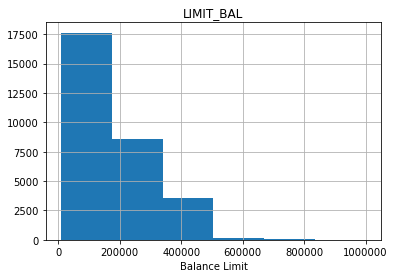

In [58]:
pd.DataFrame(yMA).hist(bins=6)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 

In [59]:
yMA= pd.cut(yMA, bins=[9999, 180000, 300000,450000, 600000,1000000],
            labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-1MIL'])


<AxesSubplot:>

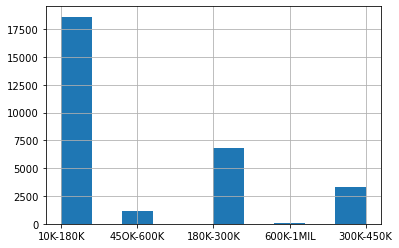

In [60]:
yMA.hist()

In [61]:
yMA = yMA.cat.codes

In [62]:
yMA = yMA.values.reshape(-1,1)

In [63]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XMA, yMA,test_size = 0.3, random_state=123)
x_test

,MARRIAGE,AGE
25665,2,26
16464,1,59
22386,2,30
10149,1,41
8729,1,43
...,...,...
17548,1,48
11459,1,43
6608,2,22
2414,1,38


In [64]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [65]:
#DecisionTreeClassifier
algo_MA1= DecisionTreeClassifier(max_depth=20, )
model_MA1 = algo_MA1.fit(x_train,y_train)
#Predictions
preds_MA1 = algo_MA1.predict(x_test)
print(classification_report(y_test, preds_MA1,zero_division=1))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      5567
           1       0.20      0.00      0.00      2133
           2       1.00      0.00      0.00       940
           3       0.00      0.00      0.00       336
           4       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.56      0.20      0.15      9000
weighted avg       0.54      0.62      0.47      9000



In [66]:
#RandomForestClassifier
algo_MA2= RandomForestClassifier(max_depth=20, )
model_MA2 = algo_MA2.fit(x_train,y_train.ravel())
#Predictions
preds_MA2 = algo_MA2.predict(x_test)
print(classification_report(y_test, preds_MA2,zero_division=1))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      5567
           1       0.23      0.00      0.00      2133
           2       1.00      0.00      0.00       940
           3       0.00      0.00      0.00       336
           4       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.57      0.20      0.15      9000
weighted avg       0.54      0.62      0.47      9000



In [67]:
#RandomForestClassifier
algo_MA3= GradientBoostingClassifier() 
model_MA3 = algo_MA3.fit(x_train,y_train.ravel())
#Predictions
preds_MA3 = algo_MA3.predict(x_test)
print(classification_report(y_test, preds_MA3,zero_division=1))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      5567
           1       0.20      0.00      0.00      2133
           2       1.00      0.00      0.00       940
           3       1.00      0.00      0.00       336
           4       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.76      0.20      0.15      9000
weighted avg       0.57      0.62      0.47      9000



In [69]:
print(cross_val_score(model_MA1, XMA, yMA.ravel(), cv=4 )) # cv = number of folds being held out

[0.6196     0.6204     0.62053333 0.62093333]


In [716]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))


In [717]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [719]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XMA,yMA.ravel())
    results.append(result)
    names.append(name)

In [720]:
results

[array([0.61816667, 0.61983333, 0.6205    , 0.61966667, 0.621     ]),
 array([0.619     , 0.62      , 0.6205    , 0.62016667, 0.62083333]),
 array([0.61966667, 0.61983333, 0.6205    , 0.62016667, 0.62016667])]

In [721]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6198333333333333
Decision Tree Classifier 0.6201000000000001
Gradient Bossting Class 0.6200666666666667


# Predictive

In [722]:
#DecisionTreeClassifier
DT=algo_MA1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.6178888888888889

In [725]:
#RandomForestClassifier
RF=algo_MA2
RF.fit(x_train, y_train.ravel())
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.6181111111111111

In [726]:
#GradientBoostingClassifier
GB=algo_MA3
GB.fit(x_train, y_train.ravel())
predictions = GB.predict(x_test)
GB.score(x_test, y_test)

0.6182222222222222

# 2. Predicting Accuracy with DT, RFC and GBC, Limit_Bal as dependant, 7 bins  Acc .62

In [41]:
XL= credit[['default payment next month_default','MARRIAGE', 'AGE']]
yL = credit['LIMIT_BAL']

Text(0.5, 0, 'Balance Limit')

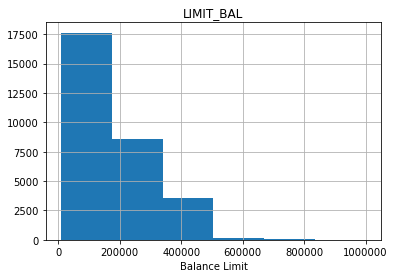

In [42]:
pd.DataFrame(yL).hist(bins=6)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 

In [43]:
yL.max()

1000000

In [44]:
yL.min()

10000

In [45]:
yL= pd.cut(yL, bins=[9999, 180000, 300000,450000, 600000,1000000], 
           labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-1MIL'])


<AxesSubplot:>

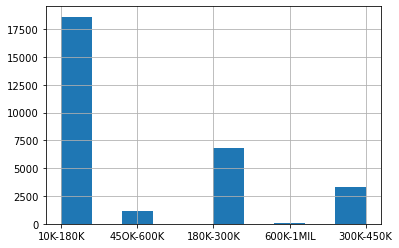

In [47]:
yL.hist()

In [48]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XL, yL,test_size = 0.3, random_state=123)
x_test

,default payment next month_default,MARRIAGE,AGE
25665,0,2,26
16464,0,1,59
22386,1,2,30
10149,1,1,41
8729,0,1,43
...,...,...,...
17548,1,1,48
11459,0,1,43
6608,0,2,22
2414,1,1,38


In [49]:
x_test

,default payment next month_default,MARRIAGE,AGE
25665,0,2,26
16464,0,1,59
22386,1,2,30
10149,1,1,41
8729,0,1,43
...,...,...,...
17548,1,1,48
11459,0,1,43
6608,0,2,22
2414,1,1,38


In [50]:
y_test

25665     10K-180K
16464     10K-180K
22386     10K-180K
10149    180K-300K
8729      10K-180K
           ...    
17548     10K-180K
11459    300K-450K
6608      10K-180K
2414      10K-180K
14757     10K-180K
Name: LIMIT_BAL, Length: 9000, dtype: category
Categories (5, object): ['10K-180K' < '180K-300K' < '300K-450K' < '45OK-600K' < '600K-1MIL']

In [51]:
#DecisionTreeClassifier
algo_LB1= DecisionTreeClassifier(max_depth=20, )
model_LB1 = algo_LB1.fit(x_train,y_train)
#Predictions
preds_LB1 = algo_LB1.predict(x_test)
print(classification_report(y_test, preds_LB1, zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      1.00      0.76      5567
   180K-300K       0.36      0.00      0.00      2133
   300K-450K       1.00      0.00      0.00       940
   45OK-600K       0.00      0.00      0.00       336
   600K-1MIL       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.60      0.20      0.15      9000
weighted avg       0.58      0.62      0.47      9000



In [52]:
#RandomForestClassifier
algo_LB2= RandomForestClassifier(max_depth=20, )
model_LB2 = algo_LB2.fit(x_train,y_train)
#Predictions
preds_LB2 = algo_LB2.predict(x_test)
print(classification_report(y_test, preds_LB2, zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      1.00      0.76      5567
   180K-300K       0.38      0.00      0.00      2133
   300K-450K       1.00      0.00      0.00       940
   45OK-600K       0.00      0.00      0.00       336
   600K-1MIL       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.60      0.20      0.15      9000
weighted avg       0.58      0.62      0.47      9000



In [53]:
#GradientBoostingClassifier
algo_LB3= GradientBoostingClassifier( )
model_LB3 = algo_LB3.fit(x_train,y_train)
#Predictions
preds_LB3 = algo_LB3.predict(x_test)
print(classification_report(y_test, preds_LB3,zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      1.00      0.76      5567
   180K-300K       0.50      0.00      0.00      2133
   300K-450K       1.00      0.00      0.00       940
   45OK-600K       1.00      0.00      0.00       336
   600K-1MIL       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.82      0.20      0.15      9000
weighted avg       0.65      0.62      0.47      9000



In [54]:
print(cross_val_score(model_LB1, XL, yL )) # cv = number of folds being held out

[0.6175     0.619      0.62033333 0.6195     0.6205    ]


In [521]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [522]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [529]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL,yL)
    results.append(result)
    names.append(name)

C:\Users\ypbow\anaconda3\envs\Task1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ypbow\anaconda3\envs\Task1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ypbow\anaconda3\envs\Task1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [530]:
results

[array([0.61733333, 0.61833333, 0.62      , 0.61916667, 0.62033333]),
 array([0.6175    , 0.619     , 0.62033333, 0.6195    , 0.6205    ]),
 array([0.6195    , 0.61916667, 0.6205    , 0.6205    , 0.62033333])]

In [531]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6190333333333333
Decision Tree Classifier 0.6193666666666667
Gradient Bossting Class 0.62


# Predictive Variables

In [532]:
#DecisionTreeClassifier
DT=algo_LB1
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [533]:
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.6177777777777778

In [534]:
#RandomForestClassifier
RF=algo_LB2
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [535]:
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.6176666666666667

In [536]:
#GradientBoostingClassifier
GB=algo_LB3
GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [537]:
predictions = GB.predict(x_test)
GB.score(x_test, y_test)

0.6182222222222222

# 3. Predicting Accuracy with DT, RFC and GBC, Limit_Bal as dependant, 7 bins, independant a lot Acc . 62

In [581]:
credit.dtypes.index

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')

In [682]:
#features
XL1 = credit[['MARRIAGE', 'AGE', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default']]


In [683]:
yL1 = credit['LIMIT_BAL']

Text(0.5, 0, 'Balance Limit')

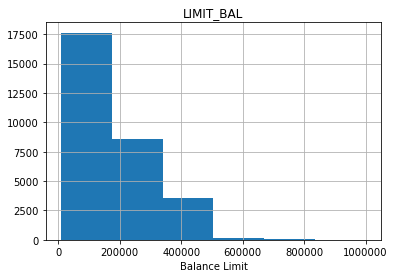

In [684]:
pd.DataFrame(yL1).hist(bins=6)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 

In [685]:
yL1= pd.cut(yL1, bins=[9999, 180000, 300000,450000, 600000,1000000],
            labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K--1MIL'])


<AxesSubplot:>

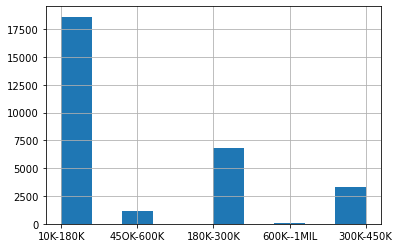

In [686]:
yL1.hist()

In [678]:
yL1 = yL1.ravel()

In [687]:
yL1 = yL1.cat.codes

In [688]:
yL1 = yL1.values.reshape(-1,1)

In [689]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XL1, yL1,test_size = 0.3, random_state=123)


In [690]:
x_test

,MARRIAGE,AGE,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
25665,2,26,1,0,0,0,0,1,0
16464,1,59,1,0,0,1,0,0,0
22386,2,30,1,0,1,0,0,0,1
10149,1,41,1,0,0,0,0,1,1
8729,1,43,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
17548,1,48,1,0,0,0,0,1,1
11459,1,43,0,1,0,0,0,1,0
6608,2,22,1,0,0,0,0,1,0
2414,1,38,0,1,0,0,0,1,1


In [691]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [692]:
#DecisionTreeClassifier
algo_XL1= DecisionTreeClassifier(max_depth=20, )
model_XL1 = algo_XL1.fit(x_train,y_train.ravel())
#Predictions
preds_XL1 = algo_XL1.predict(x_test)
print(classification_report(y_test, preds_XL1, zero_division=1))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      5567
           1       0.38      0.17      0.23      2133
           2       0.23      0.02      0.04       940
           3       0.00      0.00      0.00       336
           4       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.45      0.23      0.21      9000
weighted avg       0.52      0.62      0.54      9000



In [693]:
#RandomForestClassifier
algo_XL2= RandomForestClassifier(max_depth=20, )
model_XL2 = algo_XL2.fit(x_train,y_train.ravel())
#Predictions
preds_XL2 = algo_XL2.predict(x_test)
print(classification_report(y_test, preds_XL2,zero_division=1))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      5567
           1       0.38      0.19      0.25      2133
           2       0.23      0.03      0.05       940
           3       0.00      0.00      0.00       336
           4       1.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.46      0.23      0.22      9000
weighted avg       0.53      0.62      0.54      9000



In [ ]:
model = forest.fit(train_fold, train_y.values.ravel())

In [694]:
#GradientBoostingClassifier
algo_XL3= GradientBoostingClassifier(max_depth=20, )
model_XL3 = algo_XL3.fit(x_train,y_train.ravel())
#Predictions
preds_XL3 = algo_XL3.predict(x_test)
print(classification_report(y_test, preds_XL3, zero_division=1))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      5567
           1       0.39      0.17      0.23      2133
           2       0.21      0.02      0.04       940
           3       0.00      0.00      0.00       336
           4       0.00      0.00      0.00        24

    accuracy                           0.62      9000
   macro avg       0.25      0.23      0.21      9000
weighted avg       0.52      0.62      0.54      9000



In [696]:
print(cross_val_score(model, XL1, yL1.ravel())) # cv = number of folds being held out

[0.62916667 0.6265     0.63033333 0.62366667 0.63933333]


In [697]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [698]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [700]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL1,yL1.ravel())
    results.append(result)
    names.append(name)

In [579]:
results

[array([0.61916667, 0.62066667, 0.61783333, 0.61983333, 0.62916667]),
 array([0.6215    , 0.6215    , 0.62166667, 0.6195    , 0.63133333]),
 array([0.62866667, 0.62666667, 0.6305    , 0.62416667, 0.63933333])]

In [580]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6213333333333333
Decision Tree Classifier 0.6231
Gradient Bossting Class 0.6298666666666666


In [267]:
#DecisionTreeClassifier
DT=algo_XL1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.6178888888888889

In [268]:
#RandomForestClassifier
RF=algo_XL2
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.6177777777777778

In [270]:
#RandomForestClassifier
GB=algo_XL3
GB.fit(x_train, y_train)
predictions = GB.predict(x_test)
RF.score(x_test, y_test)

0.6177777777777778

In [71]:
credit.columns


Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')

In [121]:
#features
XL5 = credit.iloc[:, 2:-2]
yL5 = credit['default payment next month_default'].values.reshape(-1,1)


In [122]:
yL5

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

In [123]:
XL5.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,0,0,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,1,0,0,0,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,1,0,0,0,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,1,0,0,0,1


In [124]:
lim_cats= credit['LIMIT_BAL']
lim_cats= pd.cut(lim_cats, bins=[9999, 180000, 300000,450000, 600000,800000,1000000],
            labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-8OOK', '800K-1MIL'])

lim_cats=lim_cats.cat.codes

In [125]:
lim_cats

0        0
1        0
2        0
3        0
4        0
        ..
29995    1
29996    0
29997    0
29998    0
29999    0
Length: 30000, dtype: int8

In [126]:
XL5['LIMIT_BAL']=lim_cats

In [127]:
XL5.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,LIMIT_BAL
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,0
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,0
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [128]:
trainX, testX, trainY, testY = train_test_split(XL5,yL5, test_size=0.3, random_state=42)

In [129]:
testX

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,LIMIT_BAL
2308,2,25,0,0,0,0,0,0,8864,10062,...,1500,1500,2000,0,1,0,0,0,1,0
22404,2,26,0,0,0,0,0,0,136736,125651,...,2647,2669,2669,1,0,1,0,0,0,0
23397,1,32,0,0,0,0,0,0,70122,69080,...,2438,2500,2554,1,0,0,1,0,0,0
25058,2,49,0,0,0,0,0,-1,20678,18956,...,27,7011,4408,0,1,0,1,0,0,0
2664,2,36,0,0,0,0,0,2,94228,47635,...,1800,0,1000,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,2,34,1,-1,-1,-2,-2,-1,0,13621,...,0,666,0,1,0,1,0,0,0,2
17854,2,27,0,0,0,0,0,0,42585,43304,...,3000,8000,3000,0,1,1,0,0,0,1
95,2,35,0,0,0,0,0,0,83725,85996,...,1112,1104,1143,0,1,0,0,0,1,0
6279,1,36,0,0,0,0,0,0,136556,139453,...,5372,5761,5396,1,0,0,0,0,1,1


In [130]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(trainX, trainY.ravel())

In [132]:
rfc_model.score(testX, testY)

0.8123333333333334

# 4.New Model Descritising,  X- credit limit is discretize, acc .78

In [90]:
#features
XL2 = credit['LIMIT_BAL']
yL2 = credit['default payment next month_default']


Text(0.5, 0, 'Balance Limit')

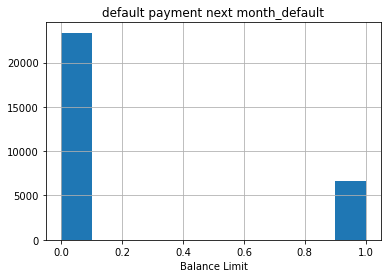

In [91]:
pd.DataFrame(yL2).hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 

In [92]:
XL2= pd.cut(XL2, bins=[9999, 180000, 300000,450000, 600000,800000,1000000],
            labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-8OOK', '800K-1MIL'])


In [93]:
XL2 = XL2.cat.codes

<AxesSubplot:>

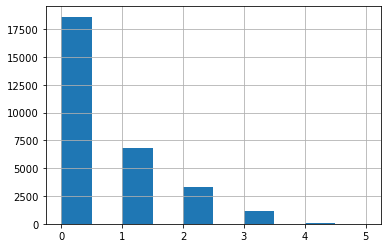

In [94]:
XL2.hist()

In [95]:
XL2 = XL2.values.reshape(-1,1)

In [96]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XL2, yL2,test_size = 0.3, random_state=123)


In [97]:
x_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [98]:
y_test

25665    0
16464    0
22386    1
10149    1
8729     0
        ..
17548    1
11459    0
6608     0
2414     1
14757    0
Name: default payment next month_default, Length: 9000, dtype: uint8

In [99]:
#DecisionTreeClassifier
algo_XLD1= DecisionTreeClassifier(max_depth=20, )
model_XLD1 = algo_XLD1.fit(x_train,y_train)
#Predicti1ons
preds_XLD1 = algo_XLD1.predict(x_test)
print(classification_report(y_test, preds_XLD1,zero_division=1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       1.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.89      0.50      0.44      9000
weighted avg       0.83      0.78      0.69      9000



In [101]:
#RandomForestClassifier
algo_XLD2= RandomForestClassifier(max_depth=20, )
model_XLD2 = algo_XLD2.fit(x_train,y_train)
#Predicti1ons
preds_XLD2 = algo_XLD2.predict(x_test)
print(classification_report(y_test, preds_XLD2,zero_division=1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       1.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.89      0.50      0.44      9000
weighted avg       0.83      0.78      0.69      9000



In [105]:
#GradientBoostingClassifier
algo_XLD3= GradientBoostingClassifier(max_depth=20, )
model_XLD3 = algo_XLD3.fit(x_train,y_train)
#Predicti1ons
preds_XLD3 = algo_XLD3.predict(x_test)
print(classification_report(y_test, preds_XLD3,zero_division=1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       1.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.89      0.50      0.44      9000
weighted avg       0.83      0.78      0.69      9000



In [109]:
print(cross_val_score(model, XL2, yL2)) # cv = number of folds being held out

[0.77866667 0.77883333 0.77883333 0.77883333 0.77883333]


In [110]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [111]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [119]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL2,yL2)
    results.append(result)
    names.append(name)

In [120]:
results

[array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333]),
 array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333]),
 array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333])]

In [121]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7788000000000002
Decision Tree Classifier 0.7788000000000002
Gradient Bossting Class 0.7788000000000002


In [106]:
#DecisionTreeClassifier
DT=algo_XLD1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.7835555555555556

In [107]:
#RandomForestClassifier
RF=algo_XLD2
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.7835555555555556

In [108]:
#RandomForestClassifier
GB=algo_XLD3
GB.fit(x_train, y_train)
predictions = GB.predict(x_test)
RF.score(x_test, y_test)

0.7835555555555556

# 5.  Credit limit is independent and not descritize .78

In [140]:
XL3 = credit['LIMIT_BAL'].values.reshape(-1,1)
yL3 = credit['default payment next month_default']


Text(0.5, 0, '0- Not default    1- Default')

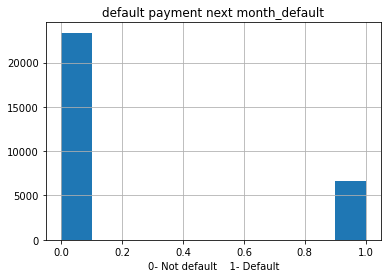

In [141]:
pd.DataFrame(yL3).hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('0- Not default    1- Default') 

In [142]:
XL3

array([[ 20000],
       [120000],
       [ 90000],
       ...,
       [ 30000],
       [ 80000],
       [ 50000]], dtype=int64)

In [143]:
yL3

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: uint8

In [144]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XL3, yL3,test_size = 0.3, random_state=123)


In [145]:
x_test

array([[ 40000],
       [ 80000],
       [170000],
       ...,
       [ 10000],
       [ 30000],
       [ 30000]], dtype=int64)

In [146]:
y_test

25665    0
16464    0
22386    1
10149    1
8729     0
        ..
17548    1
11459    0
6608     0
2414     1
14757    0
Name: default payment next month_default, Length: 9000, dtype: uint8

In [147]:
#DecisionTreeClassifier
algo_XLND1= DecisionTreeClassifier(max_depth=2)
model_XLND1 = algo_XLND1.fit(x_train,y_train)
#Predicti1ons
preds_XLND1 = algo_XLND1.predict(x_test)
print(classification_report(y_test, preds_XLND1, zero_division=1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       1.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.89      0.50      0.44      9000
weighted avg       0.83      0.78      0.69      9000



In [148]:
#RandomForestClassifier
algo_XLND2= RandomForestClassifier(max_depth=4)
model_XLND2 = algo_XLND2.fit(x_train,y_train)
#Predicti1ons
preds_XLND2 = algo_XLND2.predict(x_test)
print(classification_report(y_test, preds_XLND2,zero_division=1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       1.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.89      0.50      0.44      9000
weighted avg       0.83      0.78      0.69      9000



In [149]:
#GradientBoostingClassifier
algo_XLND3= GradientBoostingClassifier()
model_XLND3 = algo_XLND3.fit(x_train,y_train)
#Predicti1ons
preds_XLND3= algo_XLND3.predict(x_test)
print(classification_report(y_test, preds_XLND3, zero_division=1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       1.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.89      0.50      0.44      9000
weighted avg       0.83      0.78      0.69      9000



In [150]:
print(cross_val_score(model, XL3, yL3)) # cv = number of folds being held out

[0.77866667 0.77883333 0.77883333 0.77883333 0.77866667]


In [151]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [152]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [153]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL2,yL2)
    results.append(result)
    names.append(name)

In [154]:
results

[array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333]),
 array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333]),
 array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333])]

In [155]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7788000000000002
Decision Tree Classifier 0.7788000000000002
Gradient Bossting Class 0.7788000000000002


In [156]:
#DecisionTreeClassifier
DT=algo_XLND1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.7835555555555556

In [157]:
#RandomForestClassifier
RF=algo_XLND2
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.7835555555555556

In [158]:
#RandomForestClassifier
GB=algo_XLND3
GB.fit(x_train, y_train)
predictions = GB.predict(x_test)
RF.score(x_test, y_test)

0.7835555555555556

# Regression Models Defaul PMT is dependant, will not work b/c it is binary variable

In [339]:
credit.dtypes.index

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')

In [345]:
#features
X = credit[['LIMIT_BAL','MARRIAGE', 'AGE','SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university']]
print('Summary of feature sample')


Summary of feature sample


In [346]:
X.head()

,LIMIT_BAL,MARRIAGE,AGE,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,1,24,1,0,0,0,0,1
1,120000,2,26,1,0,0,0,0,1
2,90000,2,34,1,0,0,0,0,1
3,50000,1,37,1,0,0,0,0,1
4,50000,1,57,0,1,0,0,0,1


In [347]:
y= credit['default payment next month_default']

In [348]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: uint8

In [353]:
#in first line we only initialize the parameters
modelD1 = LinearRegression(n_jobs=10)
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)


In [359]:
modelD1.fit(X_train, y_train)
modelD1.score(X_test, y_test)


0.030786907373979044

In [360]:
modelD2 = RandomForestRegressor(n_jobs=10)
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)
modelD2.fit(X_train, y_train)
modelD2.score(X_test, y_test)

-0.17921722275732388

In [361]:
modelD3 = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)
modelD3.fit(X_train, y_train)
modelD3.score(X_test, y_test)



-0.08031881196297186

In [362]:
print(cross_val_score(model, X, y, cv=5, )) # cv = number of folds being held out

[0.0113635  0.01827944 0.03257882 0.03563354 0.03449126]


In [363]:
model = []
model.append(('Random Forest Regressor',RandomForestRegressor()))
model.append(('Linear Regression',LinearRegression()))
model.append(('Support Vector Regression',SVR()))

In [364]:
#classification
results = []
names = []
for name, model in model:
    result = cross_val_score(model, X,y)
    results.append(result)
    names.append(name)

In [365]:
results

[array([-0.18594922, -0.16323586, -0.14027604, -0.16133718, -0.16703291]),
 array([0.0113635 , 0.01827944, 0.03257882, 0.03563354, 0.03449126]),
 array([-0.08237153, -0.09575254, -0.11096978, -0.06629118, -0.07388353])]

In [366]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.16356624088689822
Linear Regression 0.02646931214071997
Support Vector Regression -0.0858537114525197


In [367]:
#Make Predictions
predictionsD1 = modelD1.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.031
RMSE: 0.405


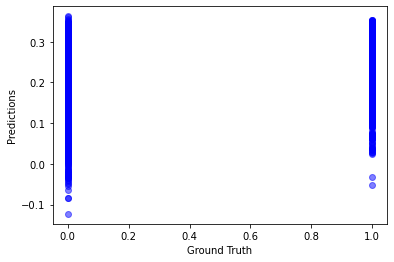

In [368]:
plt.scatter(y_test, predictionsD1, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [369]:
#Make Predictions
predictionsD2 = modelD2.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.031
RMSE: 0.405


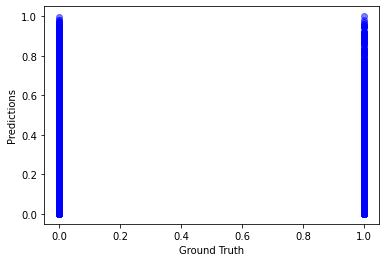

In [370]:
plt.scatter(y_test, predictionsD2, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Regression Models no Marriage

In [190]:
#features
Xm = credit[['LIMIT_BAL', 'AGE','SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',]]
print('Summary of feature sample')
Xm.head()

Summary of feature sample


,LIMIT_BAL,AGE,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,24,1,0,0,0,0,1
1,120000,26,1,0,0,0,0,1
2,90000,34,1,0,0,0,0,1
3,50000,37,1,0,0,0,0,1
4,50000,57,0,1,0,0,0,1


In [191]:
ym= credit['default payment next month_default']

In [192]:
ym

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: uint8

In [199]:
model = LinearRegression(n_jobs=10)
#train test split
X_train, X_test, y_train, y_test = train_test_split(Xm, ym,test_size = 0.3, random_state = 123)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.02998070515265483

In [200]:
model = RandomForestRegressor(n_jobs=10)
#train test split
X_train, X_test, y_train, y_test = train_test_split(Xm, ym,test_size = 0.3, random_state = 123)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.14413790992656805

In [330]:
model = SVR()
X_train, X_test, y_train, y_test = train_test_split(Xm, ym,test_size = 0.3, random_state = 123)
model.fit(X_train, y_train)
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
model.score(X_test, y_test)


-0.07981422982671371

In [202]:
print(cross_val_score(model, Xm, ym, cv=5, )) # cv = number of folds being held out

[-0.08291121 -0.09527452 -0.11097913 -0.06634994 -0.07406612]


In [207]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [211]:
results

[array([-0.16507188, -0.13113617, -0.13001531, -0.13601351, -0.13328658]),
 array([0.01001985, 0.01648288, 0.03197712, 0.03503107, 0.03467344]),
 array([-0.08291121, -0.09527452, -0.11097913, -0.06634994, -0.07406612])]

In [209]:
#classification
results = []
names = []
for name, model in model:
    result = cross_val_score(model, Xm,ym)
    results.append(result)
    names.append(name)

In [210]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.13910468944587281
Linear Regression 0.025636870345134156
Support Vector Regression -0.08591618393502469


# Regression

In [239]:
#features
Xl = credit[['MARRIAGE', 'AGE','SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university','default payment next month_default']]
print('Summary of feature sample')
Xl.head()

Summary of feature sample


,MARRIAGE,AGE,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,24,1,0,0,0,0,1,1
1,2,26,1,0,0,0,0,1,1
2,2,34,1,0,0,0,0,1,0
3,1,37,1,0,0,0,0,1,0
4,1,57,0,1,0,0,0,1,0


In [240]:
Xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   MARRIAGE                            30000 non-null  int64
 1   AGE                                 30000 non-null  int64
 2   SEX_female                          30000 non-null  uint8
 3   SEX_male                            30000 non-null  uint8
 4   EDUCATION_graduate school           30000 non-null  uint8
 5   EDUCATION_high school               30000 non-null  uint8
 6   EDUCATION_other                     30000 non-null  uint8
 7   EDUCATION_university                30000 non-null  uint8
 8   default payment next month_default  30000 non-null  uint8
dtypes: int64(2), uint8(7)
memory usage: 674.0 KB


In [241]:
yl= credit[  'LIMIT_BAL']

In [242]:
yl

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64

In [273]:
model1 = LinearRegression(n_jobs=10)
#train test split
x_train, x_test, y_train, y_test = train_test_split(Xl, yl,test_size = 0.3, random_state = 123)
model1.fit(x_train, y_train)
model1.score(x_test, y_test)


0.1269069031228951

In [280]:
model2 = RandomForestRegressor(n_jobs=10)
#train test split
x_train, x_test, y_train, y_test = train_test_split(Xl, yl,test_size = 0.3, random_state = 123)
model2.fit(x_train, y_train)
model.score(x_test, y_test)


0.1269069031228951

In [287]:
model3 = SVR()
X_train, X_test, y_train, y_test = train_test_split(Xl, yl,test_size = 0.3, random_state = 123)
model3.fit(X_train, y_train)
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
model.score(X_test, y_test)


0.1269069031228951

In [261]:
print(cross_val_score(model, Xl, yl, cv=5, )) 
#this gives you r2 because its a smart function and we run regression model# cv = number of folds being held out 

[-0.03643217 -0.04079063 -0.00228505 -0.06777305 -0.07181147]


In [263]:
model = []
model.append(('Random Forest Regressor',RandomForestRegressor()))
model.append(('Linear Regression',LinearRegression()))
model.append(('Support Vector Regression',SVR()))

In [257]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [264]:
#classification
results = []
names = []
for name, model in model:
    result = cross_val_score(model, Xl,yl)
    results.append(result)
    names.append(name)

In [265]:
results

[array([0.18733261, 0.18857597, 0.18239726, 0.16717111, 0.16578779]),
 array([0.1294874 , 0.12977424, 0.15153513, 0.11921307, 0.11854117]),
 array([-0.03643217, -0.04079063, -0.00228505, -0.06777305, -0.07181147])]

In [266]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.1782529461094224
Linear Regression 0.12971019927246583
Support Vector Regression -0.04381847352086883


In [274]:
#Make Predictions
predictions = model1.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.127
RMSE: 120233.207


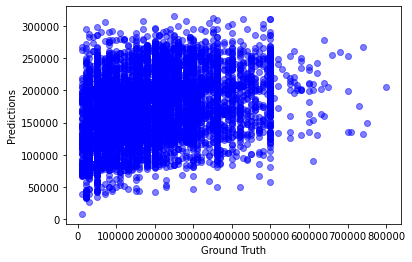

In [276]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [282]:
#Make Predictions
predictions2 = model2.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.176
RMSE: 116832.694


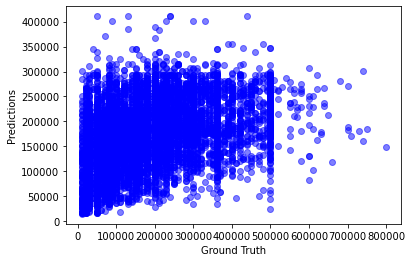

In [286]:
plt.scatter(y_test, predictions2, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [288]:
#Make Predictions
predictions3 = model3.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.176
RMSE: 116832.694


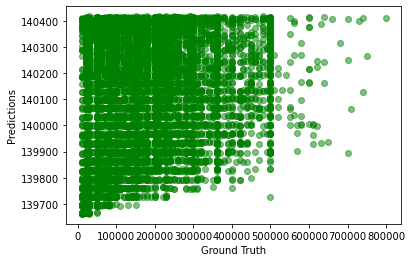

In [289]:
plt.scatter(y_test, predictions3, color=['green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();